In [12]:
import numpy as np
import random

class Neuron:

    def __init__(self, dimension=1, weights=None, bias=None, activation=(lambda x: x), predict=(lambda x: x)):

        self._dim = dimension
        self.w = weights or np.array([random.random()*(-1)**random.randint(0, 1) for _ in range(self._dim)])
        self.w = np.array([float(w) for w in self.w])
        self.b = bias if bias is not None else random.random()*(-1)**random.randint(0, 1)
        self.b = float(self.b)
        self._a = activation
        self.predict = predict.__get__(self)

    def __str__(self):

        return "Simple cell neuron\n\
        \tInput dimension: %d\n\
        \tBias: %f\n\
        \tWeights: %s\n\
        \tActivation: %s" % (self._dim, self.b, self.w, self._a.__name__)

    def __call__(self, x):

        yhat = self._a(np.dot(self.w, np.array(x)) + self.b)
        return yhat

class Trainer:
    
    def __init__(self, dataset, model, loss):
        self.dataset = dataset
        self.model = model
        self.loss = loss
        
    def cost(self, data):
        
        results = [self.loss(self.model.predict(x), y) for x, y in data]
        return float(sum(result for result in results))/float(len(results))
    
    def accuracy(self, data):
        return 100*float(sum([1 for x, y in data if self.model.predict(x) == y]))/float(len(data))
    
    def train(self, lr, ne):
        print("training model on data...")
        accuracy = self.accuracy(self.dataset)
        print("initial accuracy: %.3f" % (accuracy))
        for epoch in range(ne):
            for d in self.dataset:
                x, y = d
                x = np.array(x)
                yhat = self.model(x)
                error = y - yhat
                self.model.w += lr*(y-yhat)*x
                self.model.b += lr*(y-yhat)
            accuracy = self.accuracy(self.dataset)
            print('>epoch=%d, learning_rate=%.3f, accuracy=%.3f' % (epoch+1, lr, accuracy))
        print("training complete")
        print("final accuracy: %.3f" % (self.accuracy(self.dataset)))

In [13]:
# activation functions

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid(x):
    "Numerically stable sigmoid function."
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(z, 0)

def perceptron(z):
    return -1 if z<=0 else 1

# loss functions

def qloss(yhat, y):
    return (yhat-y)**2/2

def ploss(yhat, y):
    return max(0, -yhat*y)

def lrloss(yhat, y):
    return 0.0 if yhat==y else -1.0*(y*np.log(yhat)+(1-y)*np.log(1-yhat))

# prediction functions

def ppredict(self, x):
    return self(x)

def lrpredict(self, x):
    return 1 if self(x)>0.5 else 0

In [14]:
cat_data = dict()
with open('data/cat_data.pkl', 'rb') as f:
    cat_data = pkl.load(f)

In [15]:
def isCat(picture):
    if trainer.model.predict(list(picture.flatten()/255)) == 0:
        return("This is a cat!")
    else:
        return("There is no cat!")

In [16]:
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

def show_image(d):
    plt.imshow(d)
    plt.show()

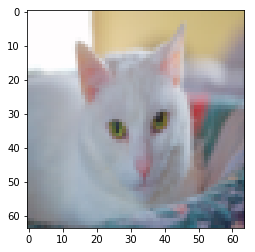

In [24]:
index = 2
picture = cat_data['test']['cat'][index]
show_image(picture)

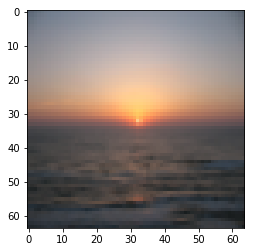

In [25]:
index = 9
picture = cat_data['test']['no_cat'][index]
show_image(picture)

In [32]:
picture.shape

(64, 64, 3)

In [33]:
picture

array([[[254, 254, 243],
        [255, 255, 246],
        [255, 255, 253],
        ...,
        [189, 119,  40],
        [207, 131,  41],
        [210, 135,  47]],

       [[254, 244, 189],
        [254, 246, 201],
        [254, 250, 222],
        ...,
        [198, 125,  43],
        [214, 136,  43],
        [213, 138,  48]],

       [[238, 207, 133],
        [239, 207, 137],
        [246, 218, 148],
        ...,
        [203, 127,  40],
        [221, 138,  42],
        [217, 138,  46]],

       ...,

       [[104,  56,  21],
        [ 89,  42,  13],
        [100,  49,  16],
        ...,
        [ 86,  52,  23],
        [ 88,  54,  24],
        [ 92,  57,  26]],

       [[108,  55,  18],
        [110,  57,  19],
        [127,  70,  27],
        ...,
        [110,  69,  33],
        [111,  71,  34],
        [108,  68,  32]],

       [[135,  76,  31],
        [141,  82,  35],
        [156,  96,  45],
        ...,
        [127,  81,  40],
        [120,  77,  38],
        [129,  84,  43]]

In [26]:
train_data = []
for x in cat_data['train']['cat']:
    train_data.append((list(x.flatten()/255), 0))
for x in cat_data['train']['no_cat']:
    train_data.append((list(x.flatten()/255), 1))
random.shuffle(train_data)
print(len(train_data))

test_data = []
for x in cat_data['test']['cat']:
    test_data.append((list(x.flatten()/255), 0))
for x in cat_data['test']['no_cat']:
    test_data.append((list(x.flatten()/255), 1))
random.shuffle(test_data)
print(len(test_data))

209
50


In [27]:
dim = len(train_data[0][0])
model = Neuron(dimension=dim, activation=sigmoid, predict=(lambda self, x: 1 if self(x)>0.5 else 0))
trainer = Trainer(train_data, model, lrloss)

In [28]:
trainer.train(0.1, 100)

training model on data...
initial accuracy: 35.885
>epoch=1, learning_rate=0.100, accuracy=65.550
>epoch=2, learning_rate=0.100, accuracy=66.507
>epoch=3, learning_rate=0.100, accuracy=66.029
>epoch=4, learning_rate=0.100, accuracy=66.986
>epoch=5, learning_rate=0.100, accuracy=70.335
>epoch=6, learning_rate=0.100, accuracy=67.943
>epoch=7, learning_rate=0.100, accuracy=67.943
>epoch=8, learning_rate=0.100, accuracy=66.029
>epoch=9, learning_rate=0.100, accuracy=71.292
>epoch=10, learning_rate=0.100, accuracy=67.464
>epoch=11, learning_rate=0.100, accuracy=68.900
>epoch=12, learning_rate=0.100, accuracy=66.029
>epoch=13, learning_rate=0.100, accuracy=80.383
>epoch=14, learning_rate=0.100, accuracy=71.292
>epoch=15, learning_rate=0.100, accuracy=68.421
>epoch=16, learning_rate=0.100, accuracy=67.464
>epoch=17, learning_rate=0.100, accuracy=73.206
>epoch=18, learning_rate=0.100, accuracy=75.120
>epoch=19, learning_rate=0.100, accuracy=69.378
>epoch=20, learning_rate=0.100, accuracy=71.77

In [29]:
trainer.accuracy(test_data)

68.0

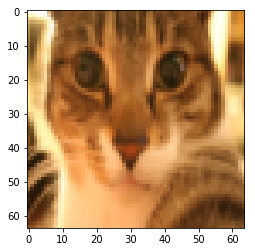

This is a cat!


In [30]:
index = 3
picture = cat_data['test']['cat'][index]
show_image(picture)
print(isCat(picture))